# DSCI 503 - Homework 05
### Pradeep K Timsina

### Problem 1: Working with 2D Arrays


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
np.random.seed(1)
z= np.random.uniform(low=0, high=10, size=(5,8))
z=z.round(2)
print(z)

[[4.17 7.2  0.   3.02 1.47 0.92 1.86 3.46]
 [3.97 5.39 4.19 6.85 2.04 8.78 0.27 6.7 ]
 [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
 [9.58 5.33 6.92 3.16 6.87 8.35 0.18 7.5 ]]


In [3]:
print(" Row 3: \t ", z[2 , :])
print(" Column 6:\t ",z[ : ,5])

 Row 3: 	  [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 Column 6:	  [0.92 8.78 9.68 8.78 8.35]


In [4]:
print("Row Sums:\t",np.sum(z,axis = 1))
print("Column Sums:\t",np.sum(z,axis = 0))
print("Array Sums:\t",np.sum(z))

Row Sums:	 [22.1  38.19 40.88 34.62 47.89]
Column Sums:	 [30.65 32.46 13.36 15.4  20.09 36.51  6.42 28.79]
Array Sums:	 183.68


### Problem 2: Reshaping and Stacking Arrays

In [5]:
np.random.seed(1)
x1=np.random.normal(50,10, size=1000)
x2=np.random.normal(20,5, size=1000)
x3=np.random.normal(100,30, size=1000)
x4=np.random.normal(10,2, size=1000)
x1= x1.reshape(1000,1)
x2= x2.reshape(1000,1)
x3= x3.reshape(1000,1)
x4= x4.reshape(1000,1)
x = np.hstack([x1,x2,x3,x4])
x = np.round(x,2)

In [6]:
print(x[:6])

[[ 66.24  19.23 114.69   9.85]
 [ 43.88   7.84 107.16  10.42]
 [ 44.72  22.54  86.56  11.97]
 [ 39.27  18.38  81.68  12.87]
 [ 58.65  12.44  39.1   11.06]
 [ 26.98  15.64 118.24   9.26]]


### Problem 3: Standardization

In [7]:
column_mean =np.mean(x,axis=0) 
column_std =np.std(x,axis=0) 
print("Column means:\t\t\t",np.round(column_mean,2))
print("Column Standard deviation:\t",np.round(column_std,2))

Column means:			 [50.39 20.14 99.33 10.01]
Column Standard deviation:	 [ 9.81  5.15 29.15  2.02]


In [8]:
w = (x - column_mean)/column_std
column_mean_w =np.mean(w,axis=0) 
column_std_w =np.std(w,axis=0) 
print("Column means:\t\t\t",np.round(column_mean_w,2))
print("Column Standard deviation:\t",np.round(column_std_w,2))

Column means:			 [-0. -0. -0. -0.]
Column Standard deviation:	 [1. 1. 1. 1.]


### Problem 4: Load Auto MPG Dataset

In [9]:
auto = pd.read_csv("auto_mpg.txt", sep='\t') 
auto.head(10)

,mpg,cyl,wt,region,model
0,27.2,4,3190,eur,peugeot 504
1,32.8,4,1985,asia,mazda glc deluxe
2,18.1,6,3410,usa,amc concord d/l
3,17.5,8,4080,usa,dodge magnum xe
4,25.4,5,3530,eur,mercedes benz 300d
5,31.0,4,1773,asia,toyota corolla 1200
6,27.4,4,2670,usa,amc spirit dl
7,39.1,4,1755,asia,toyota starlet
8,34.3,4,2188,eur,audi 4000
9,30.0,4,2155,usa,buick opel isuzu deluxe


In [10]:
print(auto.shape)

(398, 5)


In [11]:
auto.mean()

C:\Users\pradi\AppData\Local\Temp\ipykernel_9784\2601072796.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  auto.mean()


mpg      23.514573
cyl       5.454774
wt     2970.424623
dtype: float64

### Problem 5: Regional Counts and Means

In [12]:
regions = auto.region.unique()
print(regions)
print(len(regions))

['eur' 'asia' 'usa']
3


In [13]:
asia_auto = auto.loc[:,'region'] == 'asia'
eur_auto = auto.loc[:,'region'] == 'eur'
usa_auto = auto.loc[:,'region'] == 'usa'
#print(auto.loc[asia_auto,:])
print("Number of cars manufactured in Asia:\t",len(auto.loc[asia_auto,:]))
print("Number of cars manufactured in Europe:\t",len(auto.loc[eur_auto,:]))
print("Number of cars manufactured in USA:\t",len(auto.loc[usa_auto,:]))


Number of cars manufactured in Asia:	 79
Number of cars manufactured in Europe:	 70
Number of cars manufactured in USA:	 249


In [14]:
asia_means = auto.loc[asia_auto, ['mpg','cyl','wt']].mean()

eur_means = auto.loc[eur_auto, ['mpg','cyl','wt']].mean()

usa_means = auto.loc[usa_auto, ['mpg','cyl','wt']].mean()

mean_df = pd.DataFrame({
    'mpg': [asia_means[0], eur_means[0], usa_means[0]],
    'cyl':[asia_means[1], eur_means[1], usa_means[1]],
    'wt':[asia_means[2], eur_means[2], usa_means[2]],
}, index= regions)

mean_df

,mpg,cyl,wt
eur,30.450633,4.101266,2221.227848
asia,27.891429,4.157143,2423.300000
usa,20.083534,6.248996,3361.931727


### Problem 6: Average Weight and MPG by Region

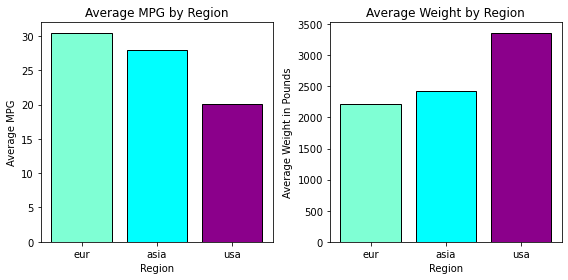

In [15]:
colors1 = ['aquamarine','cyan','darkmagenta']
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
plt.bar(x=regions, height=mean_df.loc[:,'mpg'], color=colors1, edgecolor='black')
plt.xlabel('Region')
plt.ylabel('Average MPG')
plt.title('Average MPG by Region')
plt.subplot(1,2,2)
plt.bar(x=regions, height=mean_df.loc[:,'wt'], color=colors1, edgecolor='black')
plt.xlabel('Region')
plt.ylabel('Average Weight in Pounds')
plt.title('Average Weight by Region')
plt.tight_layout()
plt.show()


### Problem 7: Relationship between Weight and Miles Per Gallon

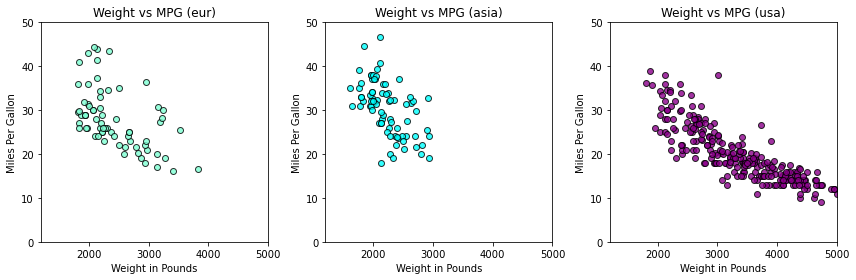

In [16]:
plt.figure(figsize=[12,4])
for reg in range(0,len(regions)):
    plt.subplot(1,3,reg+1)
    current_region_data = auto.loc[auto.loc[:,'region'] == regions[reg],:]                              
    plt.scatter(x=current_region_data.loc[:,['wt']], y=current_region_data.loc[:,['mpg']],color=colors1[reg],alpha = 0.8,edgecolor='k')
    plt.xlabel('Weight in Pounds')
    plt.ylabel('Miles Per Gallon')
    plt.title('Weight vs MPG (' + regions[reg] + ')')
    plt.ylim([0,50])
    plt.xlim([1200,5000])
plt.tight_layout()
plt.show()
    
    

### Problem 8: Cylinder Distribution by Region

In [17]:
cyl_values = np.unique(auto.cyl)
cyl_values

array([3, 4, 5, 6, 8], dtype=int64)

In [18]:
cyl_counts_by_region = pd.crosstab(auto.cyl,auto.region)
print(cyl_counts_by_region)

region  asia  eur  usa
cyl                   
3          4    0    0
4         69   63   72
5          0    3    0
6          6    4   74
8          0    0  103


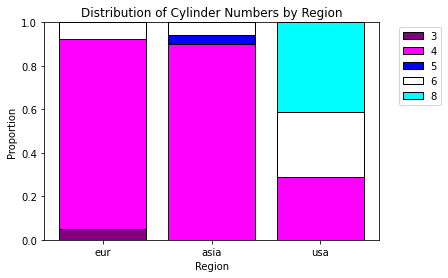

In [19]:
cyl_props_by_region = cyl_counts_by_region / np.sum(cyl_counts_by_region,axis = 0)
bar_bottoms = np.cumsum(cyl_props_by_region) - cyl_props_by_region
colors2 = ["purple","magenta","blue","white",'cyan']
plt.figure(figsize=[6,4])

for itrn in range (0, len(cyl_props_by_region)):
    plt.bar(x = regions, height = cyl_props_by_region.iloc[itrn, : ], label = cyl_values[itrn], 
            color = colors2[itrn], edgecolor = 'black', bottom = bar_bottoms.iloc[itrn, :])
    plt.legend(bbox_to_anchor=(1.20, 1.0))
    plt.title('Distribution of Cylinder Numbers by Region')
    plt.xlabel('Region')
    plt.ylabel('Proportion')
plt.show()
